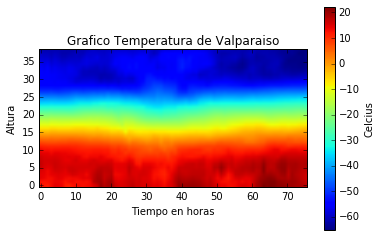

In [2]:
import numpy as np
import matplotlib.pyplot as plt

datosP = np.loadtxt("/tmp/guest-cxgqie/Fabian Trigo/PRS_Valpo_WRF.dat")
datosT = np.loadtxt("/tmp/guest-cxgqie/Fabian Trigo/TMP_Valpo_WRF.dat")
#Pasamos de Kelvin a Celsius
datosT = datosT - 273.15


#Creamos el grafico de calor
plt.imshow(datosT,origin="lower")
plt.title("Grafico Temperatura de Valparaiso")
plt.xlabel("Tiempo en horas")
plt.ylabel("Altura")
#Hacemos una barrita para saber a que temperatura se refiere cada color
plt.colorbar(label="Celcius")
plt.show()


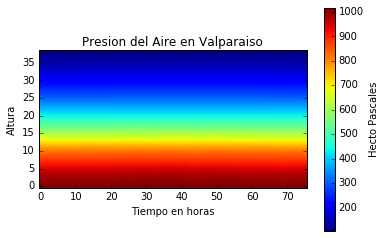

In [3]:
plt.imshow(datosP,origin="lower")
plt.title("Presion del Aire en Valparaiso")
plt.xlabel("Tiempo en horas")
plt.ylabel("Altura")
plt.colorbar(label="Hecto Pascales")
plt.show()

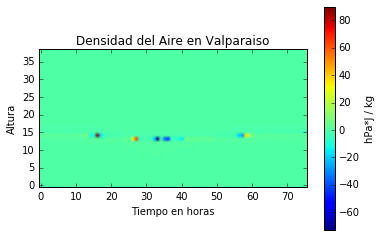

In [4]:
def densidadA(P,T): 
    R = 286.9
    return P/(R*T)

#Calculo la densidad del aire con todos los datos, tendra las mismas dimensiones
densidad = densidadA(datosP,datosT)

#Y ya es crear el grafico de calor simplemente y darle los nombres
plt.imshow(densidad,origin="lower")
plt.title("Densidad del Aire en Valparaiso")
plt.xlabel("Tiempo en horas")
plt.ylabel("Altura")
plt.colorbar(label="hPa*J / kg")
plt.show()

In [41]:
#Funcion a integrar
def funcion(x):
    return x**3 + 3*x - 1.2

#Limites de integracion
lim_inf = 0.0
lim_sup = 2.0
#Cantidad de figuras
N = 10

#Definiremos el grosor de cada figura
dx = (lim_sup - lim_inf)/N

In [42]:
#Integrar por trapezoide
#I(a,b) = dx(0.5(f(a)+f(b) + sumatoria desde i=1 a i=N-1)

#Realizaremos la sumatoria y requeriremos donde guardar
suma = 0.0 #Sera nuestro place holder
for i in range(1,N): #Es sumatoria de 1 a N-1
    suma += funcion(lim_inf + i*dx) #f(a+i*dx)
IntegralT = dx*(0.5*(funcion(lim_inf)+funcion(lim_sup))+suma)

print("Integral por trapezoides: ", IntegralT)

('Integral por trapezoides: ', 7.640000000000001)


In [59]:
#Integrar por Simpson
#I(a,b) = 1/3 * dx((f(a)+f(b) + 
#    4*sum(k=1 to N/2)(f(a + (2k-1)*dx)) 
#           + 2*sum(k=1 to N/2 -1)(f(a + 2*k*dx)) 
suma1 = 0.0
for i in range(1, int(N/2)+1): #Ira de 1 a N/2 siendo entero
    suma1 += funcion(lim_inf + (2*i -1 )*dx)

suma2 = 0.0
for i in range(1, int(N/2)): #De 1 a N/2 - 1
    suma2 += funcion(lim_inf + 2*i*dx)

trd = 0.3333333 #Calculo de antes un 1/3 aprox
I=trd*dx*(funcion(lim_inf)+funcion(lim_sup)+4.0*suma1+2.0*suma2)

    
    
print("Integral por Simspn: ",I)

('Integral por Simspn: ', 7.599999240000002)
